ANALIZA SIECI SPONTANICZNYCH SKOJARZEŃ SŁOWNYCH

sieć do wczytania: 	0. Sieć spontanicznych skojarzeń słownych

In [21]:
import networkx as nx
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [22]:
fh = open("5.txt", "rb")
graph = nx.read_edgelist(fh, create_using=nx.MultiGraph)
fh.close()

print("Sieć pierwotna")
print(f"{len(graph.nodes)} - rząd")
print(f"{len(graph.edges)} - rozmiar")

Sieć pierwotna
53995 - rząd
173661 - rozmiar


In [23]:
new_graph = nx.Graph(graph)
new_graph.remove_edges_from(nx.selfloop_edges(new_graph))
print("Sieć po usunięciu pętli i duplikatów krawędzi")
print(f"{len(new_graph.nodes)} - rząd")
print(f"{len(new_graph.edges)} - rozmiar")


Sieć po usunięciu pętli i duplikatów krawędzi
53995 - rząd
169578 - rozmiar


In [24]:
largest_cc = max(nx.connected_components(new_graph), key=len)
G = new_graph.subgraph(largest_cc)
print("Największa składowa spójna")
print(f"{len(G.nodes)} - rząd")
print(f"{len(G.edges)} - rozmiar")


Największa składowa spójna
53646 - rząd
169372 - rozmiar


In [25]:
# random.seed(0)
# for sample_size in (100, 1000, 10000):
#     sum_ = 0
#     for _ in range(sample_size):
#         pair = random.sample(list(G.nodes), 2)
#         path = nx.shortest_path(G, pair[0], pair[1])
#         path_len = len(path) - 1
#         sum_ += path_len
# 
#     average_path_len = sum_ / sample_size
# 
#     print(f"Wielkość próby: {sample_size}")
#     print(f"Średnia długość ścieżki: {average_path_len}")

In [26]:
core_numbers = nx.core_number(G)
hist_data = sorted(Counter(core_numbers.values()).items(), reverse=True)

print(f"{hist_data[0][0]} - największy stopień, liczba: {hist_data[0][1]}")
print(f"{hist_data[1][0]} - drugi największy stopień, liczba: {hist_data[1][1]}")
print(f"{hist_data[2][0]} - trzeci największy stopień, liczba: {hist_data[2][1]}")



11 - największy stopień, liczba: 1438
10 - drugi największy stopień, liczba: 1093
9 - trzeci największy stopień, liczba: 1329


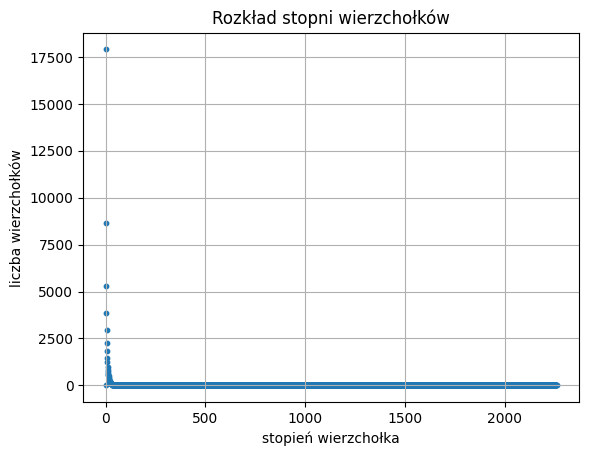

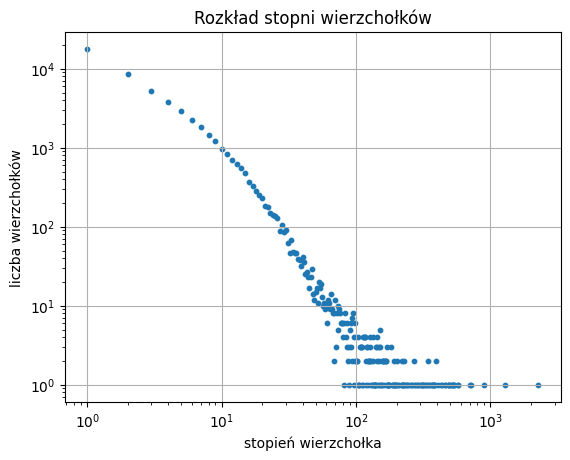

In [27]:
degree_histogram = nx.degree_histogram(G)
degree_values = list(range(len(degree_histogram)))
plt.scatter(x=degree_values, y=degree_histogram, marker='o', s=10)
plt.xlabel('stopień wierzchołka')
plt.ylabel('liczba wierzchołków')
plt.title('Rozkład stopni wierzchołków')
plt.grid(True)
plt.show()
plt.scatter(x=degree_values, y=degree_histogram, marker='o', s=10)
plt.xlabel('stopień wierzchołka')
plt.ylabel('liczba wierzchołków')
plt.xscale('log')
plt.yscale('log')
plt.title('Rozkład stopni wierzchołków')
plt.grid(True)
plt.show()


In [28]:
import numpy
from numpy import log10


def log_binning(counter_dict,bin_count=35):
    max_x = log10(max(counter_dict.keys()))
    bins = np.logspace(0,max_x,num=bin_count)
    data_x = np.array(list(counter_dict.keys()))
    data_y = np.array(list(counter_dict.values()))
    digitized = numpy.digitize(data_x, bins)
    bin_means_x = [data_x[digitized == i].mean() for i in range(1, len(bins))]
    bin_means_y = [data_y[digitized == i].mean() for i in range(1, len(bins))]

    return bin_means_x,bin_means_y

/var/folders/jb/jqvy28dj5cn6nck9v8wmrsp00000gp/T/ipykernel_30100/2307187393.py:11: RuntimeWarning: Mean of empty slice.
  bin_means_x = [data_x[digitized == i].mean() for i in range(1, len(bins))]
/Users/pszmurlo/Documents/pw/tass/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/jb/jqvy28dj5cn6nck9v8wmrsp00000gp/T/ipykernel_30100/2307187393.py:12: RuntimeWarning: Mean of empty slice.
  bin_means_y = [data_y[digitized == i].mean() for i in range(1, len(bins))]


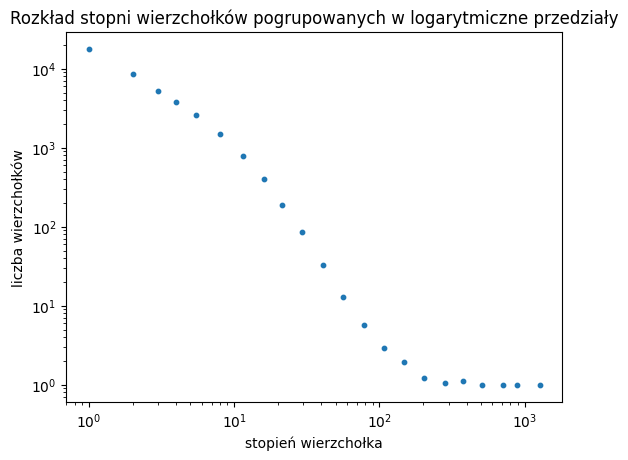

In [29]:
filtered_indices = [i for i, count in enumerate(degree_histogram) if count not in [0]]
filtered_degree_x = [i for i in range(len(degree_histogram)) if i in filtered_indices]
filtered_degree_histogram = [degree_histogram[i] for i in filtered_indices]


degree_counter = Counter()
for i, x in enumerate(filtered_degree_x):
    degree_counter[x] += filtered_degree_histogram[i]
binned_x, binned_y = log_binning(degree_counter, 25) 
plt.xscale('log')
plt.yscale('log')
plt.scatter(binned_x, binned_y ,marker='o', s=10)
plt.xlabel('stopień wierzchołka')
plt.ylabel('liczba wierzchołków')
plt.title('Rozkład stopni wierzchołków pogrupowanych w logarytmiczne przedziały')
plt.show()


y = -1.65x + 10.09
Wykładnik rozkładu potęgowego: -1.651394106405786

Power-law exponent: 1.651394106405786


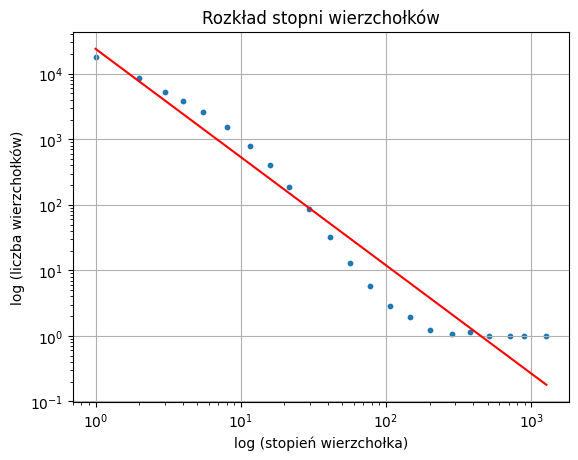

In [30]:
binned_x = np.array(binned_x)[~numpy.isnan(binned_x)]
binned_y = np.array(binned_y)[~numpy.isnan(binned_y)]
plt.scatter(binned_x, binned_y, marker='o', s=10, label='Degree Distribution')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log (stopień wierzchołka)')
plt.ylabel('log (liczba wierzchołków)')
plt.title('Rozkład stopni wierzchołków')
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(np.log(binned_x), np.log(binned_y))
plt.plot(binned_x, np.exp(intercept) * binned_x**slope, 'r', label=f'Linear Regression: $y = {slope:.2f}x + {intercept:.2f}$')
print(f"y = {slope:.2f}x + {intercept:.2f}")

print(f'Wykładnik rozkładu potęgowego: {slope}\n')
print("Power-law exponent:", -slope)

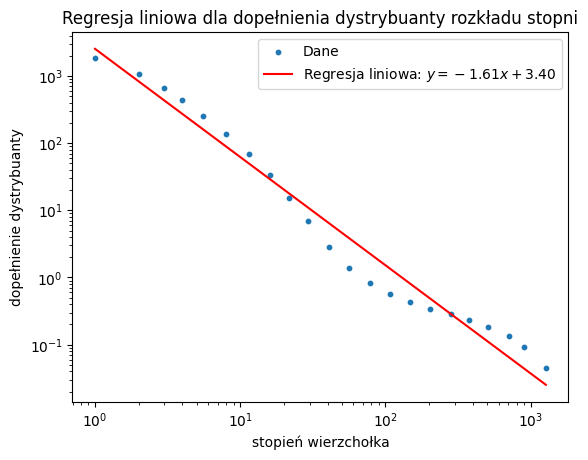

Wykładnik rozkładu potęgowego: -1.6112902549961432


In [31]:
cumulative_distribution = np.cumsum(binned_y[::-1])[::-1] / len(binned_x)

slope, intercept, r_value, p_value, std_err = linregress(np.log10(binned_x[1:]), np.log10(cumulative_distribution[1:]))

plt.scatter(binned_x, cumulative_distribution, marker='o', s=10, label='Dane')
plt.plot(binned_x, 10**(intercept + slope * np.log10(binned_x)), 'r', label=f'Regresja liniowa: $y = {slope:.2f}x + {intercept:.2f}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('stopień wierzchołka')
plt.ylabel('dopełnienie dystrybuanty')
plt.title('Regresja liniowa dla dopełnienia dystrybuanty rozkładu stopni')
plt.legend()
plt.show()

print(f'Wykładnik rozkładu potęgowego: {slope}')


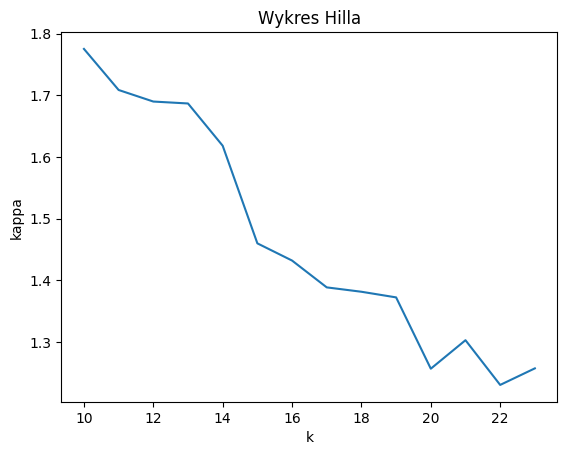

In [32]:
# https://github.com/alinasode/hill-estimator/blob/main/utils/functions.py
def Hill_estimator(data):
    Y = np.sort(data)
    n = len(Y)
    Hill_est = np.zeros(n-1)
    for k in range(0, n-1):
        summ = 0
        for i in range(0,k+1):
            summ += log10(Y[n-1-i]) - log10(Y[n-2-k])
        Hill_est[k] = (1 / (k+1)) * summ
    kappa = 1. / Hill_est
    return kappa

degree_histogram = nx.degree_histogram(G)
filtered_indices = [i for i, count in enumerate(degree_histogram) if count not in [0]]
filtered_degree_histogram = [degree_histogram[i] for i in filtered_indices]

n_obs = len(filtered_degree_histogram)
k_max = int(round(0.1*n_obs))
k_min = 10
 
kap_loss = Hill_estimator(filtered_degree_histogram)
 
plt.plot(np.arange(k_min,k_max), kap_loss[k_min-1:k_max-1])
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Wykres Hilla')
plt.show()